In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from tqdm.notebook import tqdm

In [23]:
from helpers import (
    run_hf,
    run_pyhf,
    get_p0_exp_asymptotic_exact,
    get_p0_obs_asymptotic_exact
)
import pyhf

In [5]:
data = {
    "binning": [1, 0.5, 1.5],
    "bindata": {"data": [80.0], "bkg": [50.0], "bkgerr": [7.0], "sig": [25.0]},
}

In [6]:
ndata_range = list(range(40, 200, 5))

In [ ]:
hf_pvals = []
for ndata in tqdm(ndata_range):
    hf_pvals.append(run_hf(dict(data, bindata=dict(data["bindata"], data=[ndata]))))

In [8]:
pyhf_pvals = []
for ndata in tqdm(ndata_range):
    pyhf_pvals.append(run_pyhf(dict(data, bindata=dict(data["bindata"], data=[ndata]))))

In [9]:
pyhf_minuit_pvals = []
for ndata in tqdm(ndata_range):
    pyhf_minuit_pvals.append(run_pyhf(dict(data, bindata=dict(data["bindata"], data=[ndata])), use_minuit=True))

In [10]:
get_p0_obs_asymptotic_exact(data)

0.003936878440204013

In [11]:
obs_exact = [
    get_p0_obs_asymptotic_exact(dict(data, bindata=dict(data["bindata"], data=[ndata])))
    for ndata in ndata_range
]

In [12]:
def ratio(x, a1, a2, title="pvalue", label1="ROOT/Histfactory", label2="pyhf"):
    fig, axs = plt.subplots(nrows=2, figsize=(5, 5))
    axs[0].plot(x, a1, label=label1)
    axs[0].plot(x, a2, label=label2)
    axs[1].plot(x, a1 / a2)
    axs[1].set_xlim(*axs[0].get_xlim())
    axs[0].legend()
    axs[0].set_ylabel(title)
    axs[1].set_ylabel("Ratio")
    return fig, axs

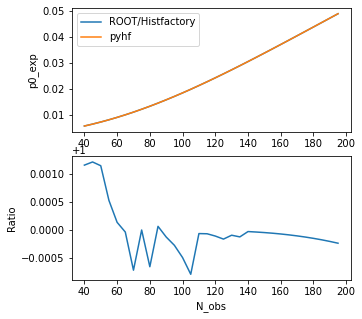

In [13]:
fig, axs = ratio(
    ndata_range,
    np.array([p["p0_exp"][2] for p in hf_pvals]),
    np.array([p["p0_exp"][2] for p in pyhf_pvals]),
    title="p0_exp"
)
axs[1].set_xlabel("N_obs")
plt.show()

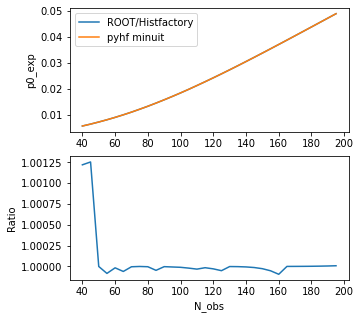

In [14]:
fig, axs = ratio(
    ndata_range,
    np.array([p["p0_exp"][2] for p in hf_pvals]),
    np.array([p["p0_exp"][2] for p in pyhf_minuit_pvals]),
    title="p0_exp",
    label2="pyhf minuit"
)
axs[1].set_xlabel("N_obs")
plt.show()

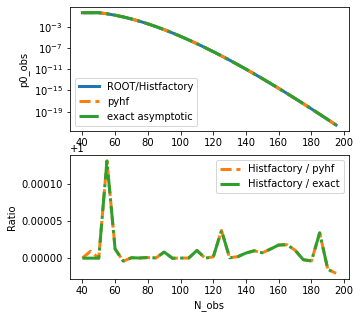

In [15]:
def plot():
    hf = np.array([p["p0_obs"] for p in hf_pvals])
    pyhf = np.array([p["p0_obs"] for p in pyhf_pvals])
    exact = obs_exact
    fig, axs = plt.subplots(nrows=2, figsize=(5, 5))
    lw = 3
    axs[0].plot(ndata_range, hf, linewidth=lw, label="ROOT/Histfactory")
    axs[0].plot(ndata_range, pyhf, "--", linewidth=lw, label="pyhf")
    axs[0].plot(ndata_range, exact, "-.", linewidth=lw, label="exact asymptotic")
    axs[0].set_ylabel("p0_obs")
    axs[0].set_yscale("log")
    axs[0].legend()
    axs[1].plot(ndata_range, hf / pyhf, "--", label="Histfactory / pyhf", color="C1", linewidth=lw)
    axs[1].plot(ndata_range, hf / exact, "-.", label="Histfactory / exact", color="C2", linewidth=lw)
    axs[1].set_ylabel("Ratio")
    axs[1].set_xlabel("N_obs")
    axs[1].legend()
plot()

In [16]:
# the one used in the validation test
source_data = {
    #"binning": [2,-0.5,1.5],
    "binning": [1, 0.5, 1.5],
    "bindata": {
        "data":    [80.0],
        "bkg":     [50.0],
        "bkgerr":  [7.0],
        "sig":     [25.0]
    }
}

In [17]:
res_pyhf = run_pyhf(source_data)

In [18]:
res_pyhf_minuit = run_pyhf(source_data, use_minuit=True)

In [ ]:
res_hf = run_hf(source_data)

In [20]:
res_hf

{'p0_obs': 0.003936881878821848,
 'p0_exp': [1.2194058979853206e-05,
  0.0006400839126137369,
  0.013196188463299147,
  0.1111587333435326,
  0.41278412774370876]}

In [28]:
res_pyhf_minuit

{'p0_obs': 0.003936878755783741,
 'p0_exp': [1.2194118166463926e-05,
  0.000640086355862132,
  0.013196225567005278,
  0.11115894063072973,
  0.41278455376684436]}

In [21]:
res_pyhf

{'p0_obs': 0.0039368787392716,
 'p0_exp': [1.2207833516870266e-05,
  0.0006406524592913935,
  0.013204821443841223,
  0.11120695708679446,
  0.4128832261329345]}

In [25]:
# hf vs pyhf
for i in range(5):
    r = res_pyhf["p0_exp"][i]
    ref = res_hf["p0_exp"][i]
    print(f"{(r - ref) / ref:.5e}")

1.12961e-03
8.88238e-04
6.54203e-04
4.33828e-04
2.40073e-04


In [26]:
# hf vs pyhf_minuit
for i in range(5):
    r = res_pyhf_minuit["p0_exp"][i]
    ref = res_hf["p0_exp"][i]
    print(f"{(r - ref) / ref:.5e}")

4.85373e-06
3.81708e-06
2.81170e-06
1.86479e-06
1.03207e-06


In [27]:
# "exact" vs pyhf
for i in range(5):
    r = res_pyhf["p0_exp"][i]
    ref = get_p0_exp_asymptotic_exact(source_data)[i]
    print((r - ref) / ref)

-7.668391370588592e-05
-6.030559259951305e-05
-4.4421178557618365e-05
-2.9460376448968097e-05
-1.6304045698627274e-05
